<a href="https://colab.research.google.com/github/mystic23/SCAPI/blob/main/Integraci%C3%B3n_y_EDOs_Runge_Kutta_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Integración Numerica

In [ ]:
import numpy as np
import sympy as sp
import scipy as sc
import scipy.integrate as integrate

In [ ]:
import sympy as sp
from scipy import integrate

x = sp.symbols('x')
f = sp.exp(x)
func = sp.lambdify(x,f)

result, error = integrate.quad(func, 0, 2)

print("Resultado:", result)
print("Error estimado:", error)


Resultado: 6.3890560989306495
Error estimado: 7.093277186654589e-14


#Sirve para la integración normal y las demás

In [ ]:
import numpy as np, sympy as sp, scipy as sc, matplotlib.pyplot as plt
def fdp_normal_estandar(z):
    return np.exp(-0.5*z**2)/np.sqrt(2*np.pi);
f=lambda x : fdp_normal_estandar(x)
I = integrate.quad(f,0,1.21)
I[0]



0.3868605535560227

#**Hacer la tablita de distribución estandar**

In [ ]:
import numpy as np
from scipy import integrate

def fdp_normal_standar(z):
    return np.exp(-0.5*z**2)/np.sqrt(2*np.pi)

f = lambda x: fdp_normal_standar(x)
I = integrate.quad(f, -3, 3)

col0 = np.arange(0, 4.1, 0.1)
fil0 = np.arange(0, 0.1, 0.01)

nc = fil0.size
nf = col0.size
N = np.zeros((nf + 1, nc + 1))

N[1:, 0] = col0
N[0, 1:] = fil0

for i in range(1, nf + 1):
    for j in range(1, nc + 1):
        z = N[i, 0] + N[0, j]
        N[i, j] = integrate.quad(f, 0, z)[0]

print("Matriz N:")
print(N)



Matriz N:
[[0.00000000e+00 0.00000000e+00 1.00000000e-02 2.00000000e-02
  3.00000000e-02 4.00000000e-02 5.00000000e-02 6.00000000e-02
  7.00000000e-02 8.00000000e-02 9.00000000e-02]
 [0.00000000e+00 0.00000000e+00 3.98935631e-03 7.97831372e-03
  1.19664734e-02 1.59534369e-02 1.99388058e-02 2.39221827e-02
  2.79031702e-02 3.18813720e-02 3.58563926e-02]
 [1.00000000e-01 3.98278373e-02 4.37953125e-02 4.77584260e-02
  5.17167867e-02 5.56700048e-02 5.96176924e-02 6.35594629e-02
  6.74949317e-02 7.14237159e-02 7.53454347e-02]
 [2.00000000e-01 7.92597094e-02 8.31661635e-02 8.70644226e-02
  9.09541151e-02 9.48348717e-02 9.87063257e-02 1.02568113e-01
  1.06419873e-01 1.10261248e-01 1.14091881e-01]
 [3.00000000e-01 1.17911422e-01 1.21719522e-01 1.25515835e-01
  1.29300019e-01 1.33071736e-01 1.36830651e-01 1.40576433e-01
  1.44308755e-01 1.48027292e-01 1.51731727e-01]
 [4.00000000e-01 1.55421742e-01 1.59097026e-01 1.62757273e-01
  1.66402179e-01 1.70031446e-01 1.73644780e-01 1.77241890e-01
  1.80

Runge Kutta

In [1]:
import numpy as np, sympy as sp, scipy as sc, matplotlib.pyplot as plt
from sympy.parsing.sympy_parser import parse_expr
# Runge Kutta de 4do orden
def Runge_Kutta_4(f,t0,y0,h,n):
    tamano = n + 1
    ty = np.zeros((n,2))

    # incluye el punto [x0,y0]
    ty[0] = [t0,y0]
    ti = t0
    yi = y0
    for i in range(1,n):
        K1 = h * f(ti,yi)
        K2 = h * f(ti+h/2, yi + K1/2)
        K3 = h * f(ti+h/2, yi + K2/2)
        K4 = h * f(ti+h, yi + K3)

        yi = yi + (1/6)*(K1+2*K2+2*K3 +K4)
        ti = ti + h

        ty[i] = [ti,yi]
    return(ty)
t,y,dy=sp.symbols('t,y,dy')
f=sp.parse_expr(input('Digita la EDO. dy=f(t,y)= '));
y0=float(input('Digita y0 = '));
t0=float(input('Digita el tiempo inicial t0 = '));
tn=float(input('Digita el tiempo final tn = '));
h=float(input('Digita h = '));
#ti=t0+i*h --> tn=t0+n*h
n=int((tn-t0)/h)+1;

#f=sp.solve(EDO,dy)

#f=lambda t,y : f(t,y)
f=sp.lambdify((t,y),f)
print(f, f(t0,y0))
sol=Runge_Kutta_4(f,t0,y0,h,n)
print(sol)
#y+1-t**2
#.5
#0
#2
#.5

t_vals = sol[:,0]
y_vals = sol[:,1]
plt.plot(t_vals, y_vals, '*k')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Grafico de y en funcion de t')



Digita la EDO. dy=f(t,y)= y+1-t**2
Digita y0 = .5
Digita el tiempo inicial t0 = 0
Digita el tiempo final tn = 2
Digita h = .5
<function _lambdifygenerated at 0x7f31d4d704c0> 1.5
[[0.         0.5       ]
 [0.5        1.42513021]
 [1.         2.63960266]
 [1.5        4.00681897]
 [2.         5.30160523]]


Digita la EDO. dy=f(t,y)= y+1-t**2
Digita y0 = .5
Digita el tiempo inicial t0 = 0
Digita el tiempo final tn = 2
Digita h = .5
<function _lambdifygenerated at 0x7f31b58115a0> 1.5
[[0.         0.5       ]
 [0.5        1.42513021]
 [1.         2.63960266]
 [1.5        4.00681897]
 [2.         5.30160523]]
[-0.05905034 -0.00498015  0.68949282  1.51414034  0.5       ]


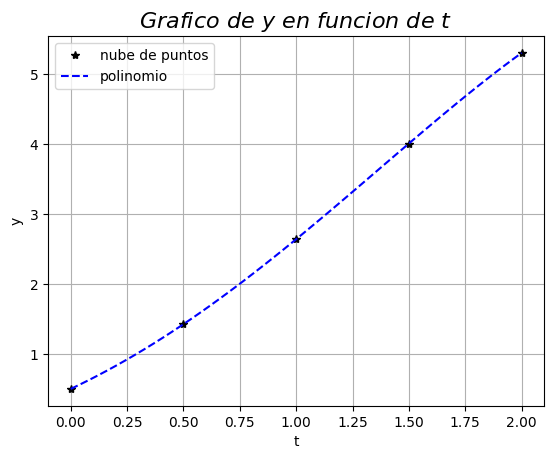

In [7]:
import numpy as np, sympy as sp, scipy as sc, matplotlib.pyplot as plt
from sympy.parsing.sympy_parser import parse_expr
# Runge Kutta de 4do orden
def Runge_Kutta_4(f,t0,y0,h,n):
    tamano = n + 1
    ty = np.zeros((n,2))

    # incluye el punto [x0,y0]
    ty[0] = [t0,y0]
    ti = t0
    yi = y0
    for i in range(1,n):
        K1 = h * f(ti,yi)
        K2 = h * f(ti+h/2, yi + K1/2)
        K3 = h * f(ti+h/2, yi + K2/2)
        K4 = h * f(ti+h, yi + K3)

        yi = yi + (1/6)*(K1+2*K2+2*K3 +K4)
        ti = ti + h

        ty[i] = [ti,yi]
    return(ty)
t,y,dy=sp.symbols('t,y,dy')
f=sp.parse_expr(input('Digita la EDO. dy=f(t,y)= '));
y0=float(input('Digita y0 = '));
t0=float(input('Digita el tiempo inicial t0 = '));
tn=float(input('Digita el tiempo final tn = '));
h=float(input('Digita h = '));
#ti=t0+i*h --> tn=t0+n*h
n=int((tn-t0)/h)+1;

#f=sp.solve(EDO,dy)

#f=lambda t,y : f(t,y)
f=sp.lambdify((t,y),f)
print(f, f(t0,y0))
sol=Runge_Kutta_4(f,t0,y0,h,n)
print(sol)
t=sol[:,0]
y=sol[:,1]

ejex=np.linspace(min(t),max(t))
coef_P=np.linalg.inv(np.vander(t))@y #Coeficientes del Polinomio de Interpolación
print(coef_P)
P=np.polyval(coef_P,ejex) # Pn(ejex)
plt.plot(t,y,'*k',label='nube de puntos')
plt.plot(ejex,P,'b--',label='polinomio')
plt.xlabel('t')
plt.ylabel('y')
plt.title(r'$Grafico\ de\ y\ en\ funcion\ de\ t$', fontsize=16)
plt.grid()
plt.legend()

#EDOs con python
# solve_ivp
# **parametros**
    solve_ivp(EDO,[t0 ,tn],[y0,0])

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  9.980e-04  1.098e-02  1.108e-01  8.107e-01
             1.945e+00  2.000e+00]
        y: [[ 5.000e-01  5.015e-01 ...  5.175e+00  5.306e+00]
            [ 0.000e+00  9.985e-04 ...  1.680e+00  1.611e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 38
     njev: 0
      nlu: 0


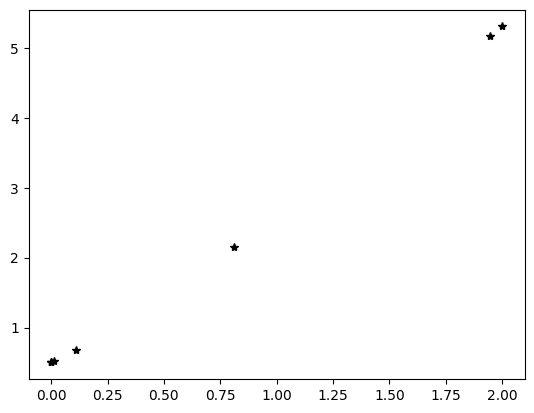

In [16]:
from scipy.integrate import odeint, solve_ivp

EDO = lambda t,y: y+1-t**2 #t+1] #una literalmente, varias en una lista
sol_ivp = solve_ivp(EDO,[0,2],[.5,0])
print(sol_ivp)
t = sol_ivp.t
y = sol_ivp.y
# print(t,'\n\n',y)
plt.plot(t,y[0,:],'*k')

#EDOs con python
# ideint(EDO,[yo,0],[t0,tn],tfirst=True)

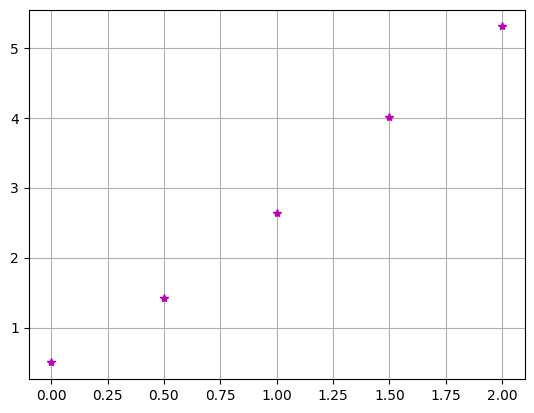

In [25]:
EDO = lambda t,y: y+1-t**2 #t+1] #una literalmente, varias en una lista
T = np.arange(0,2.1,0.5)
sol_odeint = odeint(EDO,.5,T,tfirst=True)
plt.plot(T,sol_odeint[:,0], '*m')
plt.grid(True)

#EJERCICIOS
##**Atractor de Lorenz**
referencia: https://es.wikipedia.org/wiki/Atractor_de_Lorenz

\begin{align*}
\frac{dx}{dt} &= a(y - x) \\
\frac{dy}{dt} &= x(b - z) - y \\
\frac{dz}{dt} &= xy - cz \\
\end{align*}


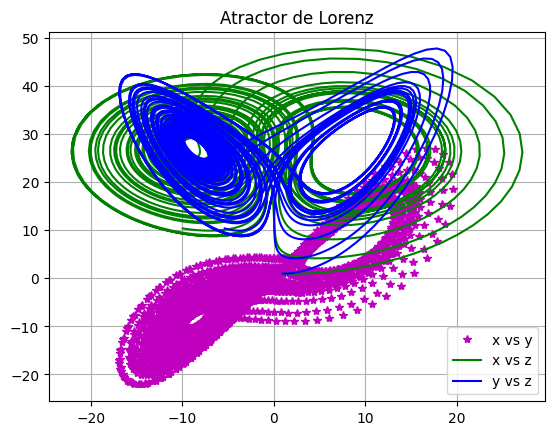

[[ 1.          1.          1.        ]
 [ 1.01256574  1.25992001  0.98489104]
 [ 1.04882146  1.52400084  0.97311434]
 ...
 [-4.50670743 -8.37607864 10.02465404]
 [-4.91100152 -9.13134989 10.16754395]
 [-5.35152405 -9.94522389 10.38289606]]


In [45]:
EDO = lambda t,y: [10*(y[1]-y[0]) ,y[0]*(28-y[2])-y[1], y[0]*y[1]-8*y[2]/3] #y es un vector y=[x,y,z]- [y[0],y[1],y[2]]
T = np.arange(0,40,0.01)
sol_odeint = odeint(EDO,[1,1,1],T,tfirst=True)
plt.title('Atractor de Lorenz')
plt.plot(sol_odeint[:, 0], sol_odeint[:, 1], '*m', label='x vs y')
plt.plot(sol_odeint[:, 1], sol_odeint[:, 2], 'g', label = 'x vs z')
plt.plot(sol_odeint[:, 0], sol_odeint[:, 2], 'b', label = 'y vs z')
plt.grid(True)
plt.legend()
plt.show()
print(sol_odeint)

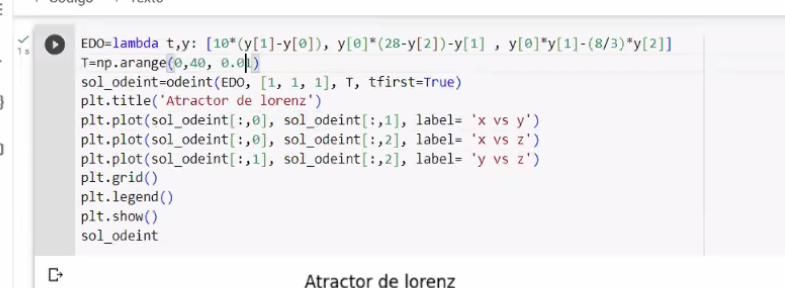

# Oscilador de van der Pol
${\displaystyle {d^{2}x \over dt^{2}}-\mu (1-x^{2}){dx \over dt}+x=0}$

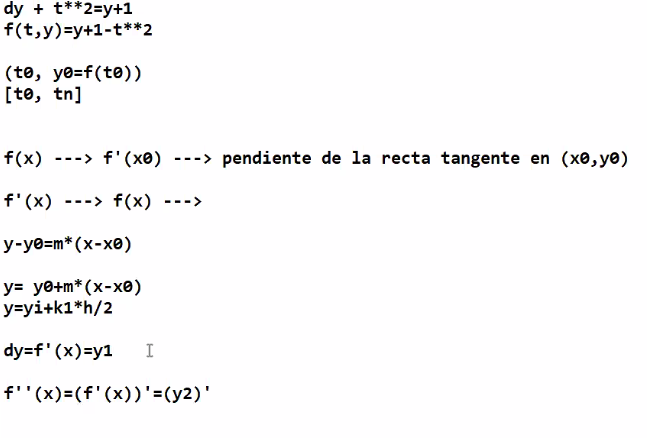

[[ 2.          0.        ]
 [ 1.99093338 -0.17265481]
 [ 1.96695252 -0.30072111]
 [ 1.93183209 -0.39739534]
 [ 1.88817772 -0.47284973]
 [ 1.83771915 -0.53452342]
 [ 1.78155292 -0.58775061]
 [ 1.72032135 -0.63637467]
 [ 1.65433584 -0.68324222]
 [ 1.58365714 -0.73057114]
 [ 1.50814417 -0.78021808]
 [ 1.42747983 -0.83387551]
 [ 1.34117957 -0.8932215 ]
 [ 1.24858669 -0.96003964]
 [ 1.14885665 -1.03631726]
 [ 1.04093275 -1.12432058]
 [ 0.92351598 -1.22663049]
 [ 0.79503487 -1.34609732]
 [ 0.65362726 -1.48562831]
 [ 0.49715789 -1.64764933]
 [ 0.32331668 -1.83297438]
 [ 0.12987491 -2.03871172]
 [-0.08478604 -2.25487424]
 [-0.32074732 -2.45993416]
 [-0.57519852 -2.61728393]
 [-0.84096605 -2.67747906]
 [-1.10582254 -2.59242656]
 [-1.35384398 -2.34085322]
 [-1.56926048 -1.94879513]
 [-1.74114948 -1.48342666]
 [-1.86607389 -1.0210604 ]
 [-1.94730728 -0.61592061]
 [-1.99193208 -0.29018707]
 [-2.00794059 -0.04196495]
 [-2.00246361  0.14216339]
 [-1.98111186  0.27809913]
 [-1.94797826  0.37989181]
 

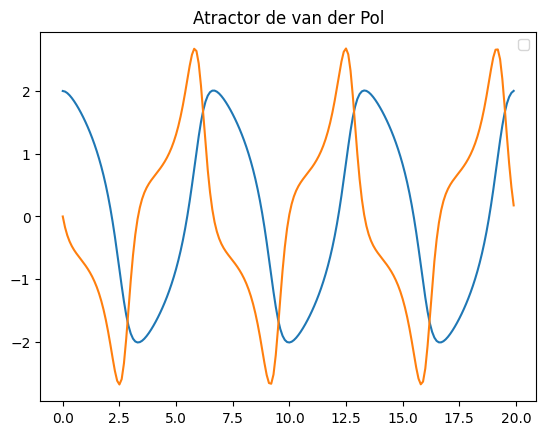

In [54]:
EDO = lambda t,y: [y[1], (1 - y[0]**2)*y[1]-y[0]] #y es un vector y=[x,y,z]- [y[0],y[1],y[2]]
T = np.arange(0,20,0.1)
sol_odeint = odeint(EDO,[2,0],T,tfirst=True)

plt.title('Atractor de van der Pol')
plt.plot(T, sol_odeint[:, 0],T, sol_odeint[:, 1])
print(sol_odeint)
# plt.grid(True)
plt.legend()
plt.show()

#maximo 4 de primer orden